In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 7))
    return(rmse)

In [ ]:
!ls

 clean_dataset.csv	     sample_data	     test.csv	 train.pkl	 X_train_v1.csv
'data_description (1).txt'   sample_submission.csv   test.pkl	 X_test_v1.csv	 X_train_v2.csv
 data_description.txt	    'test (1).csv'	     train.csv	 X_test_v2.csv


In [ ]:
import pandas as pd

In [ ]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")

In [ ]:
# remove Id and target variable
X_train = train[train.columns.values[1:-1]]
y_train = train[train.columns.values[-1]]

# remove Id
X_test = test[test.columns.values[1:]]

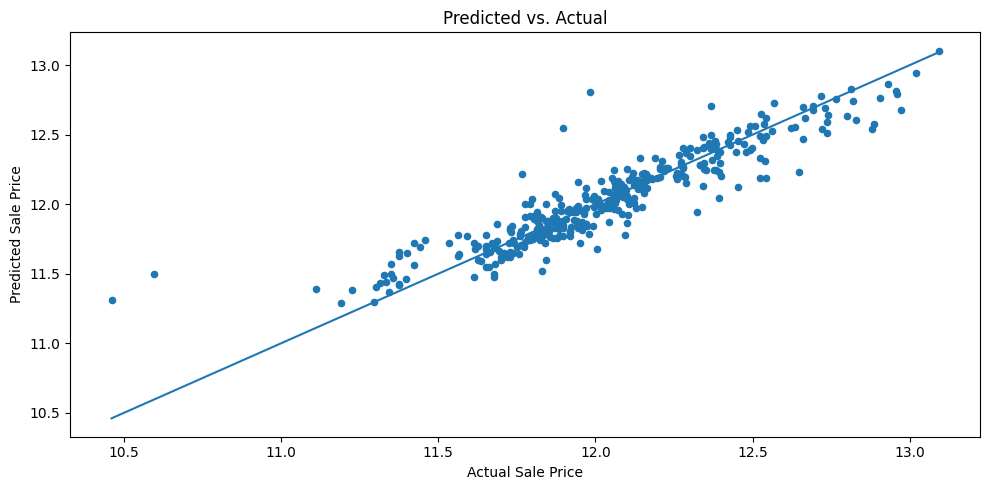

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split

%matplotlib inline

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)
model_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

model_rf.fit(X_train1, y_train1)
rf_pred = model_rf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, rf_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [ ]:
model_rf.fit(X_train, y_train)
rf_pred_log = model_rf.predict(X_test)

In [ ]:
rf_pred_log

array([11.74334686, 11.94042853, 12.08512514, ..., 11.946488  ,
       11.64072304, 12.36463897])

In [ ]:
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':np.expm1(rf_pred_log)})
submission.tail(1)

,Id,SalePrice
2918,2919,234364.927712


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
model_rige = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge

[0.13449740483918624,
 0.1334612172593055,
 0.13133708097316002,
 0.12903881454647728,
 0.1275248835101892,
 0.12704617728100703,
 0.126726149641348,
 0.12685595267299402,
 0.12803373294409837,
 0.1299473629878313,
 0.13218289186064355]

Text(0, 0.5, 'rmse')

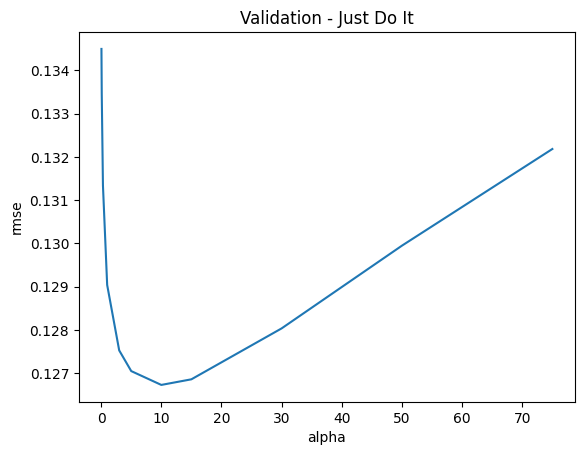

In [ ]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
cv_ridge.min()

0.126726149641348

In [ ]:
cv_ridge

,0
0.05,0.134497
0.10,0.133461
0.30,0.131337
1.00,0.129039
3.00,0.127525
5.00,0.127046
10.00,0.126726
15.00,0.126856
30.00,0.128034
50.00,0.129947


In [ ]:
model_ridge = Ridge(alpha = 10).fit(X_train, y_train)
rmse_cv(model_ridge).mean()

0.126726149641348

In [ ]:
#prediction
y_test_pred_log = model_ridge.predict(X_test)
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':np.expm1(y_test_pred_log)})
submission.head()

,Id,SalePrice
1460,1461,118113.146107
1461,1462,152846.170517
1462,1463,181755.350754
1463,1464,197458.445245
1464,1465,198982.910886
